In [5]:
# Import rasterio and matplotlib
import rasterio
import matplotlib.pyplot as plt
import numpy as np


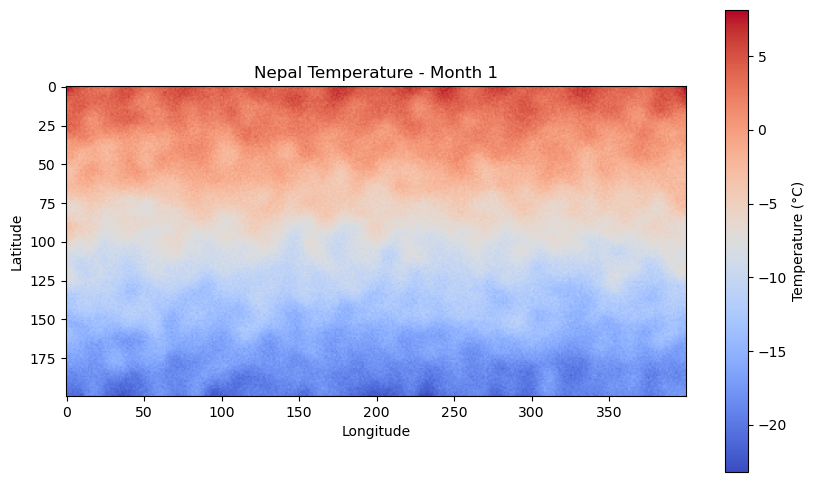

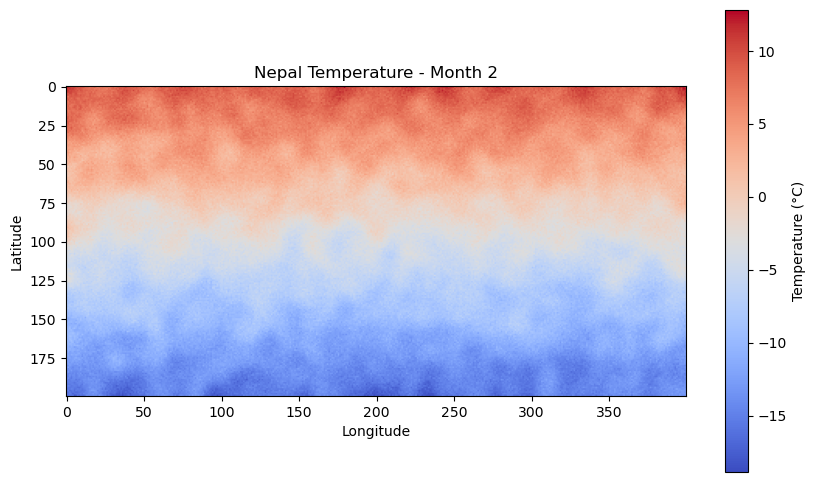

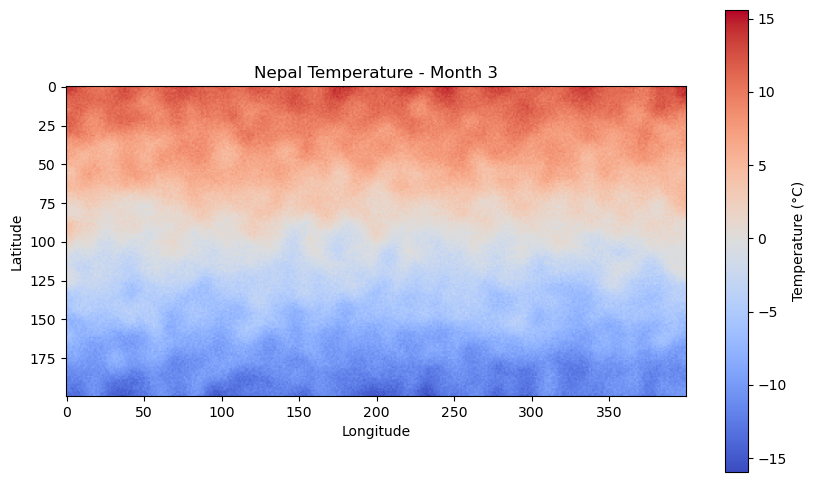

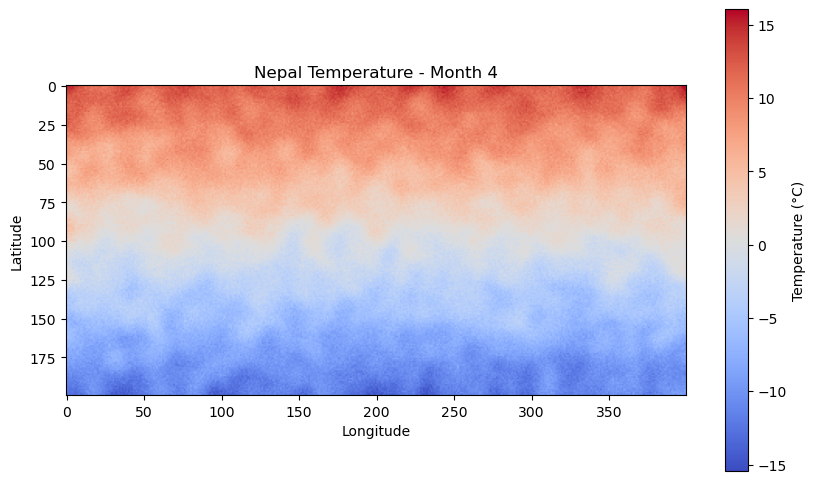

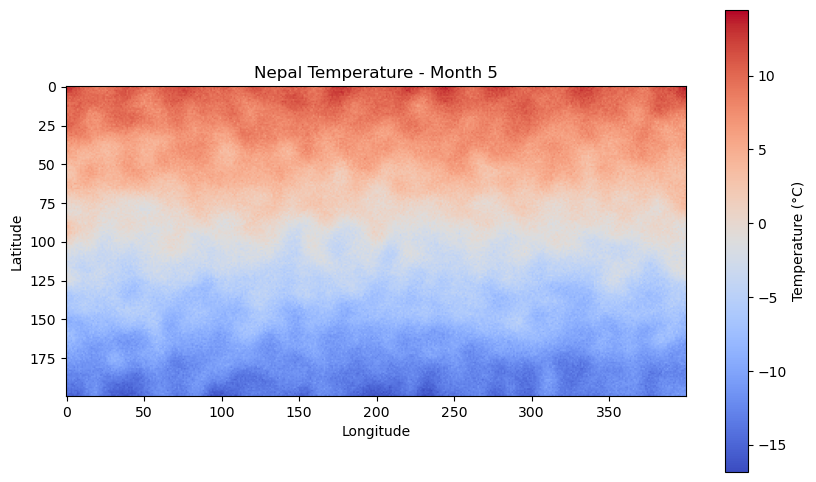

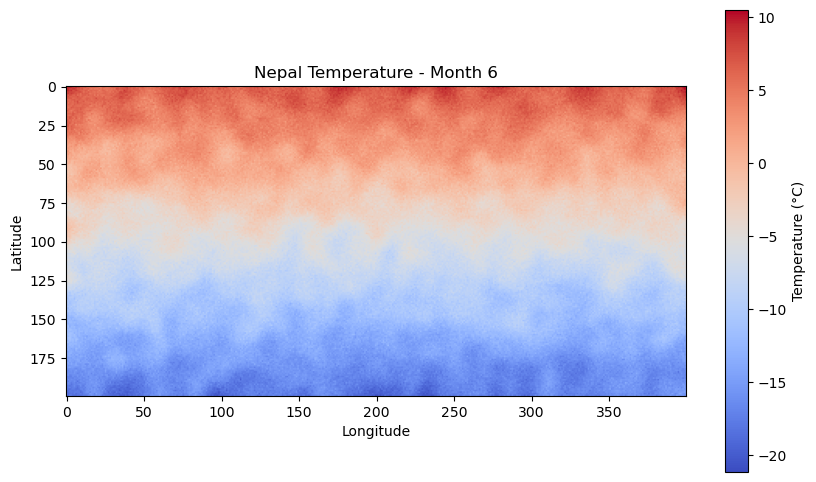

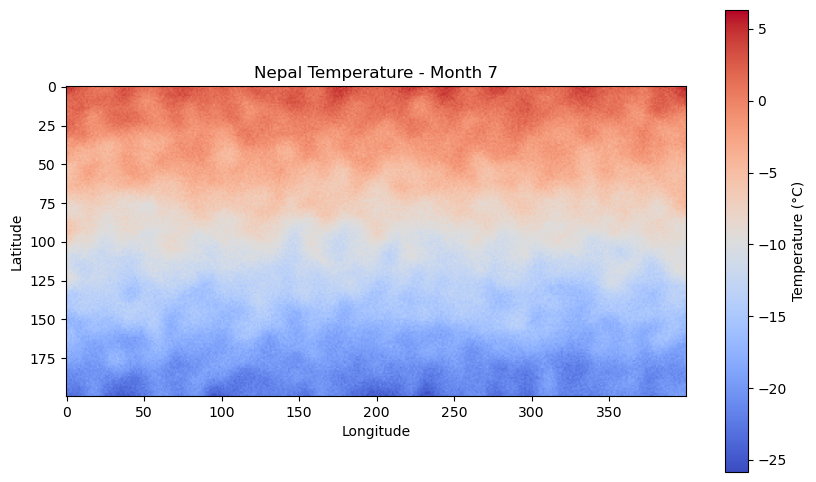

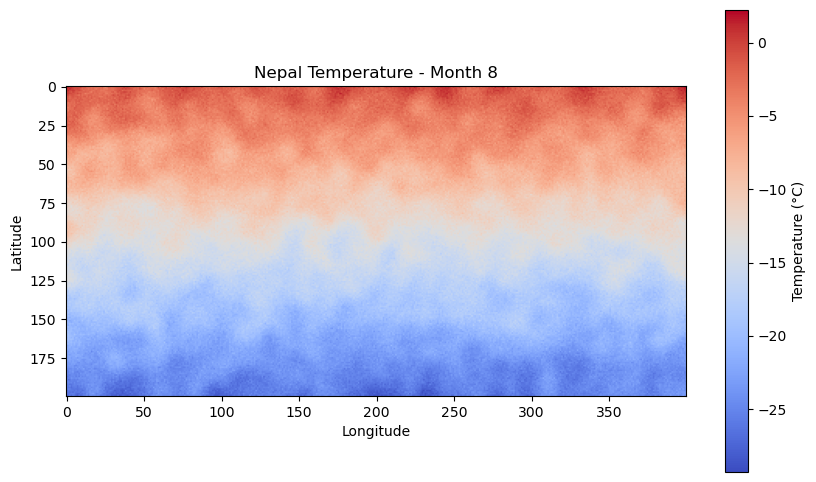

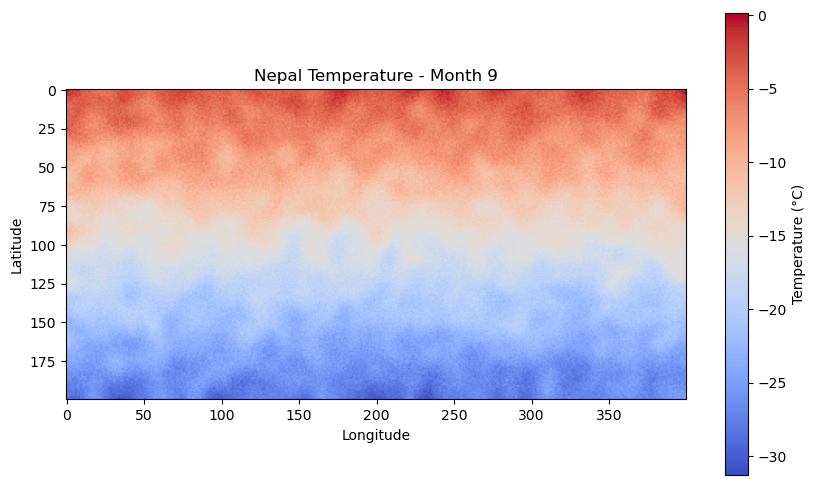

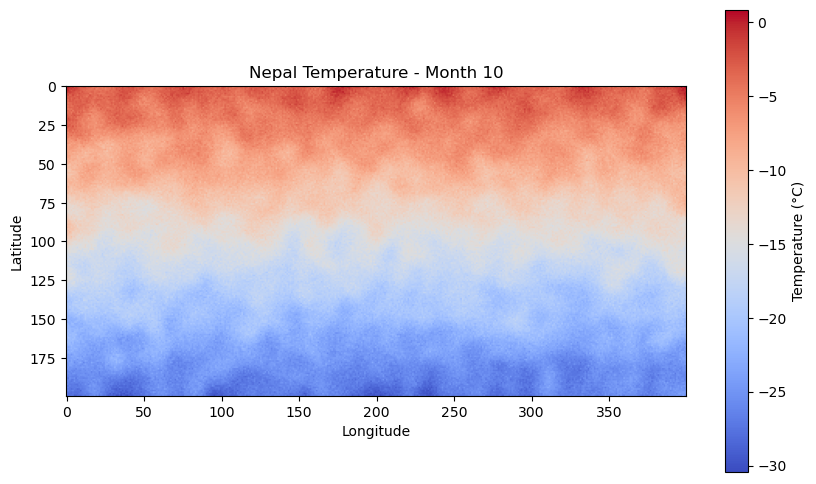

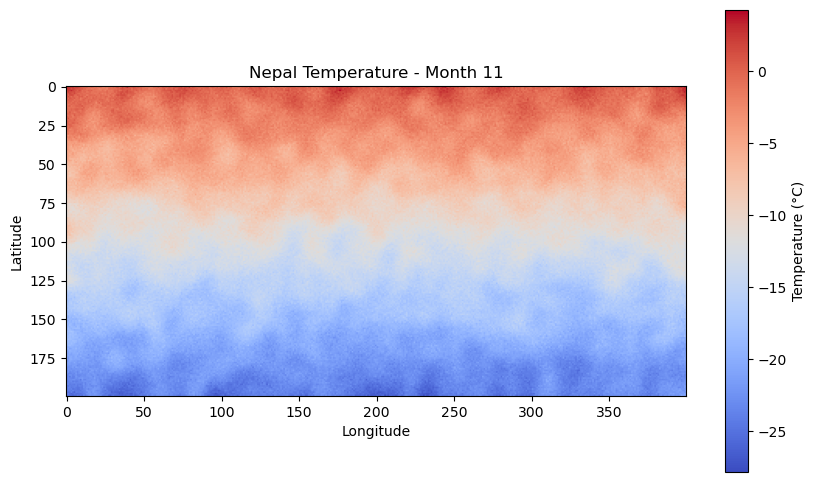

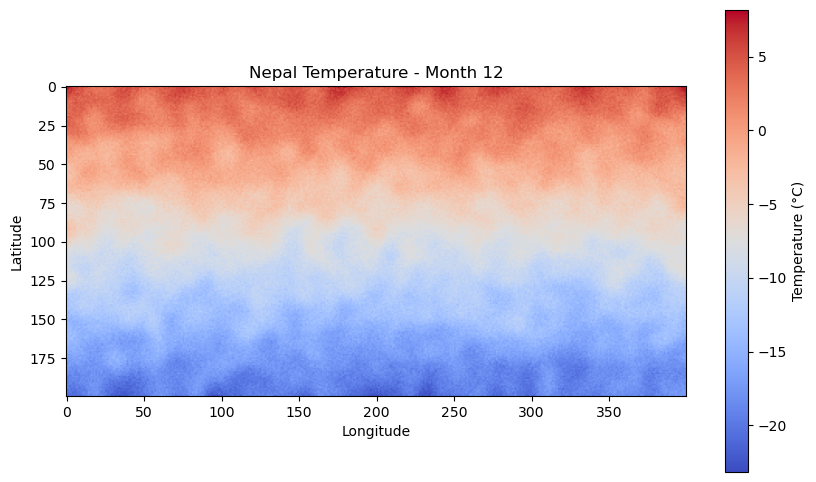

In [9]:

tif_file = 'nepal_temperature_2020.tif'


with rasterio.open(tif_file) as src:
    for band_num in range(1, 13):
        band_data = src.read(band_num)
        plt.figure(figsize=(10, 6))
        plt.imshow(band_data, cmap='coolwarm')  # Use coolwarm colormap for temperature
        plt.colorbar(label='Temperature (°C)')
        plt.title(f'Nepal Temperature - Month {band_num}')
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        plt.show()

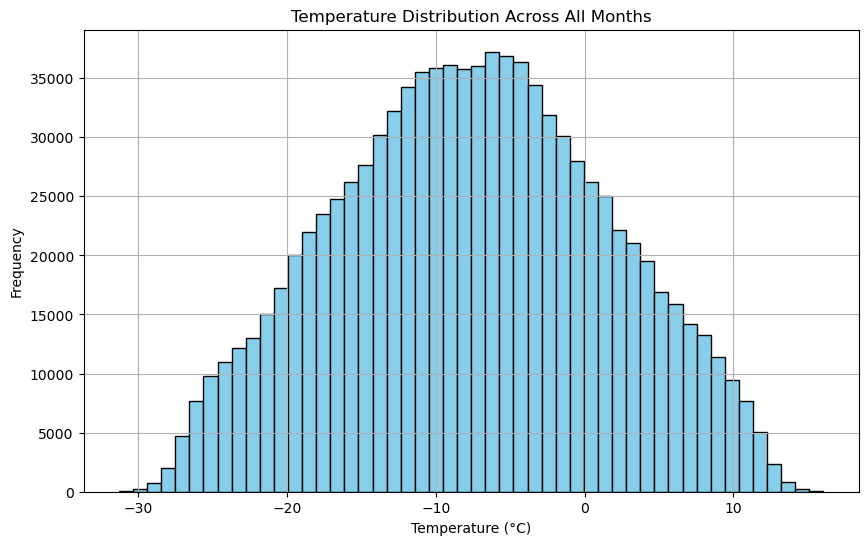

In [13]:

all_temperatures = []
with rasterio.open(tif_file) as src:
    for band_num in range(1, 13):
        band_data = src.read(band_num) 
        all_temperatures.extend(band_data.flatten())
plt.figure(figsize=(10, 6))
plt.hist(all_temperatures, bins=50, color='skyblue', edgecolor='black')
plt.title('Temperature Distribution Across All Months')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



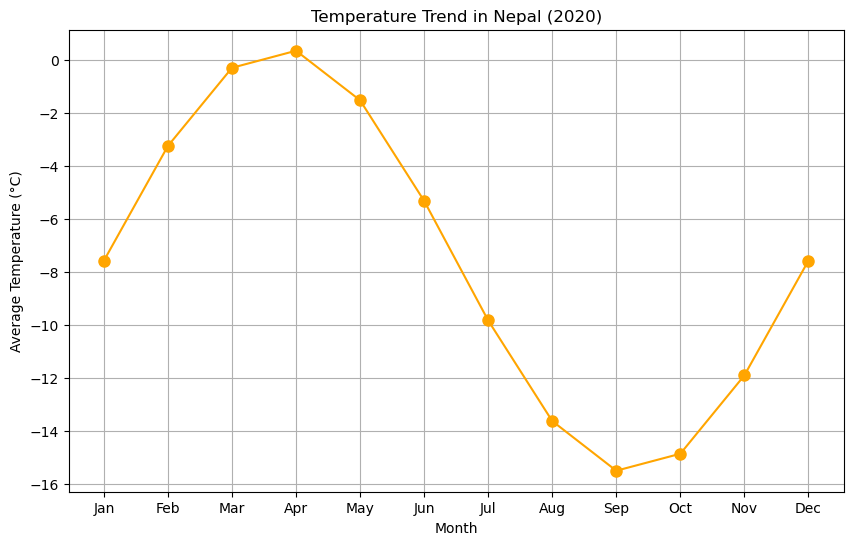

In [15]:

monthly_avg_temperatures = []

# Open the raster file using rasterio
with rasterio.open(tif_file) as src:
    for band_num in range(1, 13):
        band_data = src.read(band_num) 
        mean_temp = np.nanmean(band_data)  # Use np.nanmean to avoid NaN values
        monthly_avg_temperatures.append(mean_temp)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 13), monthly_avg_temperatures, marker='o', color='orange', linestyle='-', markersize=8)
plt.title('Temperature Trend in Nepal (2020)')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()
